2. Поиск брендов

In [15]:
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer

nltk.download('punkt')
nltk.download('stopwords')

morph = MorphAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Список брендов для поиска в видео
# Содержит официальные названия различных компаний, сервисов и брендов на русском и английском языках
BRANDS_LIST = [
    'Сбер', 'Тинькофф', 'Яндекс', 'ВКонтакте', 'Aviasales', 'Т-Банк', 'Телеграм', 'Золотое яблоко', 'Realme', 'Магнит', 'Jaguar', 'Republic', 'Genotek',
    'Лаборатория Касперского', 'Wildberries', 'Ozon', 'Пятёрочка', 'Периодика', 'Бирдок', 'Genotek', 'Центральный университет', 'Кардио М', 'Rainbow',
    'Перекрёсток', 'Вкусно и точка', 'Avito', 'Xiaomi', 'Вкусвилл', 'Алиса', 'Lamoda', 'Черный жемчуг', 'Wae Thunder', 'Axe', 'Fit Sevice', 'Bombbar',
    'Додо пицца', 'ТНТ', 'Honor', 'OneTwoTrip', 'Samsung', 'Мегафон', 'CoolCola', 'Philips', 'Yves Rocher', 'Bang Bang Education', 'Дром', 'Битрикс24',
    'Читай-город', 'Contented', 'Flowwow', 'Skyeng', 'LitEnergy', 'Эльдорадо', 'Majestic RP', 'Mozabrick', 'Bonnie&Slide', 'Selectel',
    'МТС', 'Wibes', 'Билайн','Авто.ру', 'Кавёр', 'Московский институт психологии', 'BR Group', 'Аксум', 'Wink', 'FitStars', 'Redmi', 'Foreo', 'Skypro',
    'Синхронизация', 'Нетология', 'Букмейт', 'Суточно.ру', 'Kari', 'Erborian', 'Ivi', 'Индилайт', 'ЛЭТУАЛЬ', 'Pinskiy&Co', 'Smart', 'Островок!',
    'RingString', 'Здравсити.ру', 'Primavera', 'Roborock', 'Модульбанк', 'Махеевъ', 'PREMIER', 'Профи.ру', 'Rox', 'Fresh'
] 

# Словарь для нормализации названий брендов
# Ключ - официальное название бренда
# Значение - список возможных вариантов написания (с ошибками, в различных падежах и т.д.), поиск которых осуществлялся вручную
BRAND_NORMALIZATION = {
    'Сбер': ['сбербанк', 'сбером', ' сбере ', 'сбера', ' збер', 'сберкарта', ' спер '],
    'Тинькофф': [' тинькоф ', ' тинькоффом ', ' тинькоффа ',' тинькофф '],
    'Т-Банк': [' т банк ', ' т банком ', ' т банке ', ' т банка ', 'тбанк', 'тбанке', 'т-банк', 'т-банке', 'тбнк', 'т-банка', ' т-', 't-банк'],
    'Лаборатория Касперского': ['лаборатории касперского', 'лабораторию касперского', 'лабораторией касперского'],
    'Яндекс': ['yandex', 'яндексом', 'яндекса', 'яндексе'],
    'ВКонтакте': [' вк ', ' vk '],
    'Wildberries': ['вайлдберриз', 'wildberry', 'валдберис', 'вайлдберис', 'вайлдберрисе', 'wibberies'],
    'Aviasales': ['авиасейлс', 'авиа сейлс', 'авиас', 'aviaes', ' авиа '],
    'Пятёрочка': ['пятерочке', 'пятерочку', 'пятерочках', 'пятёрочке', 'пятёрочку', 'пятёрочках'],
    'Телеграм': ['телеграм', 'телега', 'телеграме', 'телеге', ' тгк ', 'телеграмом'], 
    'Золотое Яблоко': [' золотое яблоко ', 'золотом яблоке', 'золотого яблока'],
    'Ozon': [' азон ', ' озон ', ' озоне ', ' озоном ', 'ozone'],
    'Периодика': ['периодике', 'периодику', 'периодики', 'периодика'],
    'Бирдок': ['бир док', 'бирдок'],
    'Вкусвилл': ['вкусвилле', ' вкус вилл ', ' вкус вилле ', 'вкус вил', 'вкусвил'],
    'Алиса': [' алисой ', ' алисы ', ' алиса '],
    'Додо пицца': ['додо пиццу', 'додо пицца'],
    'Мегафон': ['мегафоном', 'мегафон'],
    'Читай-город': ['читай городе', 'читай город', 'читай города'],
    'Нетология': ['нетологии', 'нетология'],
    'Авто.ру': ['авто ру', ' автору', 'a.ru', 'ато.ru', 'авто.ru', 'ато.ру'],
    'Синхронизация': ['синхронизации', 'синхронизация'],
    'Суточно.ру': ['суточно ру', ' суточно ', 'суточна.ру'],
    'Avito': ['авито'],
    'Xiaomi': ['сяоми'],
    'Honor': [' онор ', 'honor'],
    'OneTwoTrip': ['ван ту трип', 'вантутрип'],
    'Samsung': ['самсунг', 'самсунгом'],
    'CoolCola': ['кулкола', 'кулколу', 'кулколы'],
    'Contented': ['контентед', 'котен', ' кон '],
    'Flowwow': ['флоувоу', 'флаувау', 'флава', ' fl ', 'flow wow'],
    'Skyeng': ['скаенг', 'скаенге', 'скаенгом'],
    'Majestic RP': ['маджестик рп', 'маджестик', 'maes', 'magestic', 'mages', 'мажестик', 'majestic', 'maes rp'],
    'Mozabrick': ['мозабрик', 'моза брик', 'мозабрике', 'мозабриком'],
    'Wibes': ['вайбс', 'vibes', 'vipes'],
    'Кавёр': [' ковёр ', 'ковра', 'ковре'],
    'BR Group': ['биаргруп', 'би ар груп'],
    'Wink': [' винк '],
    'FitStars': ['фитстарс', 'фит старс', 'fit stars'],
    'Redmi': ['редми', 'рэдми'],
    'Kari': [' кари '],
    'Erborian': ['эрбориан', 'эр бориан', 'бариан', ' риан '],
    'Ivi': [' иви '],
    'Lamoda': [' ламода ', 'ламоду', 'ламоде', 'ламоды'],
    'Philips': ['филипс'],
    'Yves Rocher': ['ив роше', 'ивроше', ' roch ', 'и в роше'],
    'RingString': ['ринг стринг', 'рингстринг', 'рин стринг', ' стрин ', 'ring string'],
    'Здравсити.ру': ['здравсити ру', 'здрав сити ру'],
    'Primavera': ['примавера'],
    'LitEnergy': ['лит энерджи', 'литэнерджи', 'лит энержи', 'литэнержи', 'lit energy', 'l energy', 'energy', 'линер', 
                  ' тенер ', 'le energy', 'energ', 'energy', 'let energy'],
    'Roborock': ['роборок', 'робо рок'],
    'Модульбанк': ['модуль банк', 'модульбанк', 'модуль банке'],
    'ЛЭТУАЛЬ': ['летуаль'],
    'Махеевъ': ['махеев'],
    'Genotek': ['генотек'],
    'МТС': ['mts', 'мтс', 'mtc', 'mtс'],
    'Билайн': ['билайн', 'белайн'],
    'Магнит': [' магнит'],
    'PREMIER': ['premьр', 'премьер '],
    'Bonnie&Slide': ['бонни и слайд', 'бони илай'],
    'Профи.ру': ['profi'],
    'Букмейт': ['bookmate'],
    'Bang Bang Education': ['bbang education'],
    'Jaguar': ['ягуар'],
    'Axe': [' акс '],
    'Republic': ['republ'],
    'Индилайт': ['индилай', 'инлай', 'инди light', 'индий '],
    'Pinskiy&Co': ['пинский ику'],
    'Островок!': ['островок'],
    'Selectel': ['select', 'selecttel'],
    'Fit Sevice': ['фитсервис'],
    'Fresh': ['фреш'],
    'Дром': [' дром ', ' дроме '],
    'Битрикс24': ['битрикс', 'битрикс 24', 'bitрих24', 'bitrix'],
    'Bombbar': ['бомбар'],
} 

In [27]:
# Рекламные маркеры
AD_MARKERS = [
    'реклама', 'рекламная', 'рекламный', 'рекламные',
    'спонсор', 'спонсоры', 'спонсорский',
    'партнер', 'партнёр', 'партнеры', 'партнёры',
    'промокод', 'промо-код', 'промо код',
    'скидка', 'скидки', 'скидочный',
    'купон', 'купоны',
    'переходи', 'переходите', 'перейди',
    'покупай', 'покупайте', 'купить',
    'закажи', 'заказывайте', 'заказать',
    'выгода', 'выгодно', 'выгодная',
    'успей', 'успейте', 'успевай',
    'по ссылке', 'ссылка в описании',
    'в описании', 'под видео',
    'регистрируйся', 'регистрируйтесь',
    'бесплатно', 'акция', 'акции',
    'эксклюзивно', 'эксклюзивный',
    'специально', 'специальный',
    'только сегодня', 'только сейчас',
    'ограниченное предложение',
    'получи', 'получите', 'получай',
    'бонус', 'бонусы', 'бонусный',
    'подарок', 'подарки',
    'код', 'кодовое слово',
    'активируй', 'активируйте',
    'предложение', 'выгодное предложение',
    'магазин', 'магазине',
    'условия', 'условиями',
    'доставка', 'доставкой',
    'закажите', 'заказать',
    'оформить', 'оформляйте',
    'платформа', 'платформе',
    'сервис', 'сервисе',
    'приложение', 'приложении',
    'тариф', 'тарифы',
    'подписка', 'подпишись',
    'пробный период', 'пробная версия'
]

In [28]:
def clean_for_general_analysis(text):
    """Общая очистка текста для анализа"""
    text = text.lower() #приводим к нижнему регистру
    text = ' '.join(text.split()) #удаляем лишние пробелы
    return text

def clean_for_brand_detection(text):
    """Очистка текста для поиска брендов"""
    return f' {text.lower()}' #приводим к нижнему регистру и добавляем пробелы

In [29]:
def lemmatize_text(text):
    """
    Лемматизация текста - приведение слов к их начальной форме
    Сохраняет оригинальное написание брендов
    """
    words = word_tokenize(text) #разбиваем текст на слова
    
    # Создаем множество всех возможных вариантов написания брендов
    brand_variations = set() #множество для всех возможных вариантов написания брендов
    for brand in BRANDS_LIST:
        brand_variations.add(brand.lower()) #добавляем все бренды в множество
        if brand in BRAND_NORMALIZATION:
            brand_variations.update(v.strip() for v in BRAND_NORMALIZATION[brand]) #добавляем все варианты написания брендов в множество
    
    # Лемматизируем слова, пропуская бренды
    lemmatized_words = []
    for word in words:
        word_lower = word.lower() #приводим слово к нижнему регистру
        if word_lower in brand_variations:
            lemmatized_words.append(word)  # сохраняем оригинальное написание бренда
        else:
            lemmatized_words.append(morph.parse(word)[0].normal_form) #приводим слово к начальной форме
    
    return ' '.join(lemmatized_words)

In [30]:
def remove_stopwords(text):
    """Удаление стоп-слов из текста"""
    stop_words = set(stopwords.words('russian') + ['это', 'вот', 'ну', 'всё', 'все', 'ещё', 'кстати'])
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

In [31]:
def find_brand_mentions_with_source(transcript):
    """Поиск упоминаний брендов с указанием источника (прямое совпадение или нормализация)"""
    mentions = []
    seen = set()
    
    for entry in transcript:
        text = clean_for_brand_detection(entry['text']) #очищаем текст для поиска брендов
        time = entry['start'] #время начала упоминания бренда
        
        # Проверка основных названий брендов (прямые совпадения)
        for brand in BRANDS_LIST:
            brand_lower = f' {brand.lower()} ' #приводим бренд к нижнему регистру и добавляем пробелы
            if brand_lower in text:
                key = (brand, int(time)) #ключ для бренда и времени
                if key not in seen: #если ключ не встречался, добавляем в список упоминаний
                    mentions.append({
                        'brand': brand,
                        'time': time,
                        'context': entry['text'][:50] + '...', #контекст упоминания бренда
                        'detection_type': 'прямое_совпадение' #тип обнаружения бренда
                    })
                    seen.add(key)
        
        # Проверка нормализированных вариантов написания брендов
        for brand, variations in BRAND_NORMALIZATION.items(): #проверяем все варианты написания брендов
            for variant in variations: #проверяем все варианты написания бренда
                if variant in text: #если вариант написания бренда в тексте
                    key = (brand, int(time)) #ключ для бренда и времени
                    if key not in seen:
                        mentions.append({
                            'brand': brand,
                            'time': time,
                            'context': entry['text'][:50] + '...',
                            'detection_type': 'подлежащие_нормализации',
                            'matched_variant': variant
                        })
                        seen.add(key)
    
    return sorted(mentions, key=lambda x: x['time']) #сортируем упоминания по времени

In [32]:
def analyze_videos_with_detection_stats(videos_df):
    '''
    Анализ видео с подробной статистикой по методам обнаружения брендов
    '''
    results = []
    all_mentions = []
    
    for _, video in videos_df.iterrows():
        # Получаем упоминания с типом обнаружения
        mentions = find_brand_mentions_with_source(video['transcript'])
        brands = list(set(m['brand'] for m in mentions)) #список уникальных брендов
        
        # Подсчитываем упоминания по типу обнаружения
        direct_matches = [m for m in mentions if m['detection_type'] == 'прямое_совпадение'] 
        normalized_matches = [m for m in mentions if m['detection_type'] == 'подлежащие_нормализации'] 

        # Определяем, является ли видео рекламой
        is_ad = any(brand in video['title'].lower() for brand in brands) #проверяем, есть ли бренд в названии видео
        is_ad_pattern = any(marker in video['title'].lower() or marker in video['raw_text'].lower() for marker in AD_MARKERS) #проверяем, есть ли рекламный маркер в названии или тексте видео
        
        # Формируем результаты анализа для видео
        results.append({
            'channel': video['channel'],
            'video_id': video['video_id'],
            'title': video['title'],
            'brands': brands,
            'brand_mentions': mentions,
            'brand_count': len(brands),
            'direct_match_count': len(direct_matches),
            'normalized_match_count': len(normalized_matches),
            'is_ad': is_ad, 
            'is_ad_pattern': is_ad_pattern,  
            'raw_text': video['raw_text'],
            'cleaned_text': lemmatize_text(clean_for_general_analysis(video['raw_text'])), #очищаем текст для анализа
            'no_stopwords': remove_stopwords(lemmatize_text(clean_for_general_analysis(video['raw_text']))) #очищаем текст от стоп-слов
        })
        
        # Добавление к общему списку упоминаний для последующего анализа
        all_mentions.extend(mentions)
    
    return pd.DataFrame(results), pd.DataFrame(all_mentions) #возвращаем результаты анализа и список упоминаний

In [33]:
def analyze_detection_methods(mentions_df):
    """Анализ эффективности методов обнаружения брендов"""
    # Подсчет упоминаний по типу обнаружения
    detection_counts = mentions_df['detection_type'].value_counts()
    
    # Подсчет уникальных брендов по типу обнаружения
    unique_brands_by_type = mentions_df.groupby('detection_type')['brand'].nunique()
    
    # Наиболее частые нормализованные варианты
    normalized_variations = mentions_df[mentions_df['detection_type'] == 'подлежащие_нормализации']['matched_variant'].value_counts()
    
    # Бренды, чаще всего обнаруживаемые через нормализацию
    normalized_brands = mentions_df[mentions_df['detection_type'] == 'подлежащие_нормализации']['brand'].value_counts() 
    
    return {
        'detection_counts': detection_counts,
        'unique_brands_by_type': unique_brands_by_type,
        'top_variations': normalized_variations.head(10), #топ 10 наиболее частых нормализованных вариантов
        'top_normalized_brands': normalized_brands.head(10) #топ 10 брендов, чаще всего обнаруживаемых через нормализацию
    }

In [34]:
def visualize_detection_stats(stats):
    """Визуализация статистики методов обнаружения брендов"""
    # 1. График сравнения методов обнаружения
    plt.figure(figsize=(10, 6))
    stats['detection_counts'].plot(kind='bar', color='pink')
    plt.title('Сравнение методов обнаружения брендов', fontsize=14, color='black', fontfamily='Arial')
    plt.xlabel('Метод обнаружения', fontsize=12, color='black', fontfamily='Arial')
    plt.ylabel('Количество упоминаний', fontsize=12, color='black', fontfamily='Arial')
    plt.xticks(rotation=45, fontsize=10, color='black', fontfamily='Arial')
    plt.tight_layout()
    plt.show()
    
    # 2. График уникальных брендов по методам
    plt.figure(figsize=(10, 6))
    stats['unique_brands_by_type'].plot(kind='bar', color='olive')
    plt.title('Уникальные бренды по методу обнаружения', fontsize=14, color='black', fontfamily='Arial')
    plt.xlabel('Метод обнаружения', fontsize=12, color='black', fontfamily='Arial')
    plt.ylabel('Количество уникальных брендов', fontsize=12, color='black', fontfamily='Arial')
    plt.xticks(rotation=45, fontsize=10, color='black', fontfamily='Arial')
    plt.tight_layout()
    plt.show()
    
    # 3. График топ вариаций написания
    plt.figure(figsize=(12, 6))
    stats['top_variations'].plot(kind='barh', color='purple')
    plt.title('Топ-10 наиболее частых вариаций написания', fontsize=14, color='black', fontfamily='Arial')
    plt.xlabel('Количество упоминаний', fontsize=12, color='black', fontfamily='Arial')
    plt.tight_layout()
    plt.show()

In [35]:
videos_df = pd.read_csv('youtube_data.csv') #загружаем данные из csv файла

#преобразуем строку с транскриптом обратно в список словарей
import ast
def parse_transcript(transcript_str):
    if isinstance(transcript_str, str): #если транскрипт строка
        try:
            return ast.literal_eval(transcript_str) #преобразуем строку в список словарей
        except:
            return []
    return transcript_str #если транскрипт не строка, возвращаем его как есть

videos_df['transcript'] = videos_df['transcript'].apply(parse_transcript) #применяем функцию к столбцу транскрипт

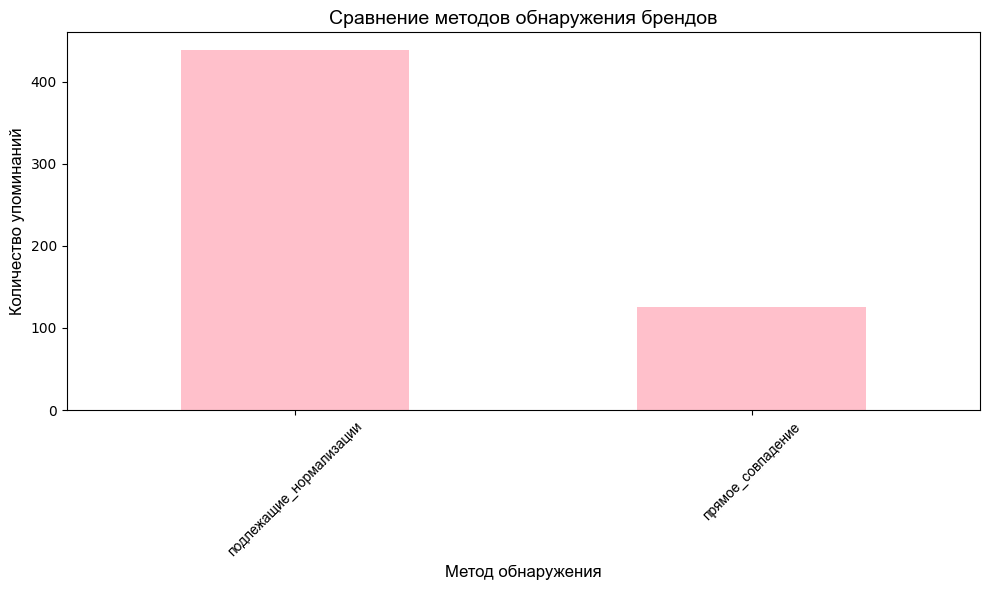

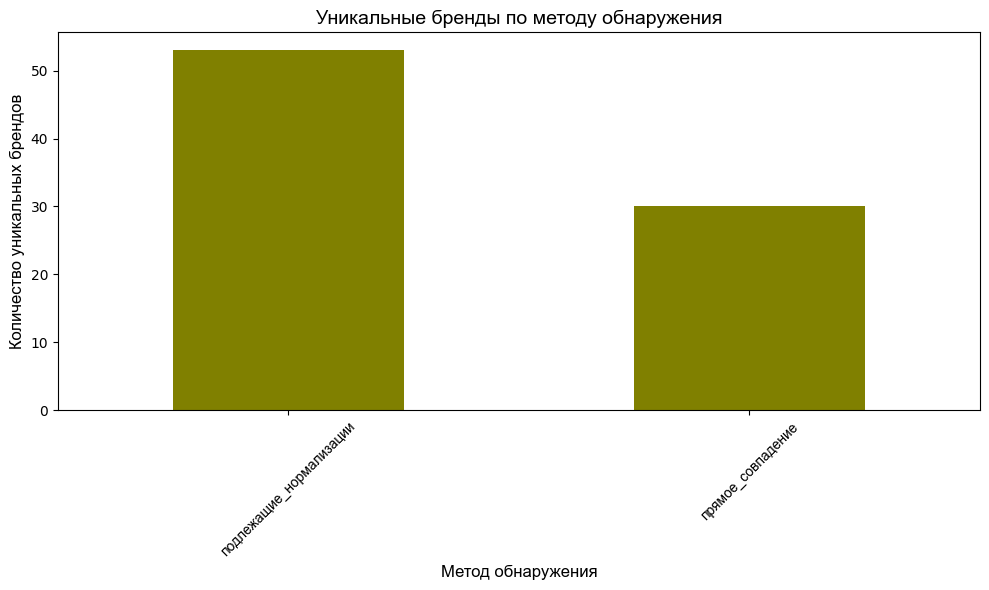

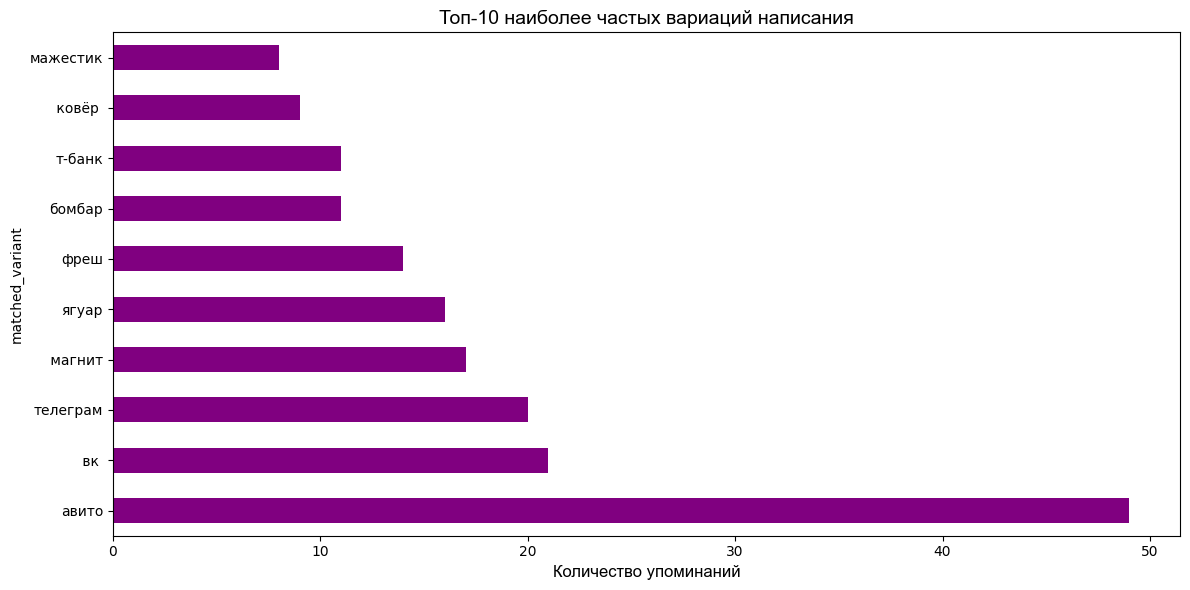


Статистика обнаружения брендов:
Всего упоминаний: 563

По методам обнаружения:
detection_type
подлежащие_нормализации    438
прямое_совпадение          125
Name: count, dtype: int64

Уникальные бренды по методам:
detection_type
подлежащие_нормализации    53
прямое_совпадение          30
Name: brand, dtype: int64

Топ-10 вариаций написания:
matched_variant
авито       49
 вк         21
телеграм    20
 магнит     17
ягуар       16
фреш        14
бомбар      11
т-банк      11
 ковёр       9
мажестик     8
Name: count, dtype: int64


In [36]:
if __name__ == "__main__":
    # Загружаем данные из CSV файла
    videos_df = pd.read_csv('youtube_data.csv')
    videos_df['transcript'] = videos_df['transcript'].apply(parse_transcript) #применяем функцию к столбцу транскрипт
    
    # Анализируем видео и получаем статистику обнаружения
    results_df, mentions_df = analyze_videos_with_detection_stats(videos_df)
    
    # Анализируем методы обнаружения
    detection_stats = analyze_detection_methods(mentions_df)
    
    # Визуализируем результаты
    visualize_detection_stats(detection_stats)
    
    # Выводим подробную статистику
    print("\nСтатистика обнаружения брендов:")
    print(f"Всего упоминаний: {len(mentions_df)}")
    print("\nПо методам обнаружения:")
    print(detection_stats['detection_counts'])
    print("\nУникальные бренды по методам:")
    print(detection_stats['unique_brands_by_type'])
    print("\nТоп-10 вариаций написания:")
    print(detection_stats['top_variations'])
    
    # Сохраняем результаты в CSV файлы
    results_df.to_csv('brand_analysis_with_detection.csv', index=False)
    mentions_df.to_csv('brand_mentions_detailed.csv', index=False)